# ***Question*** : *Which type of customers are more likely to churn* ?


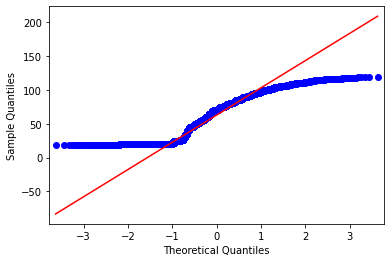

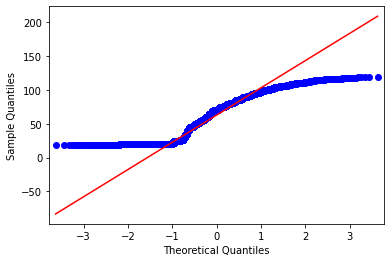

In [ ]:
import statsmodels.api as sm
sm.qqplot(df1['MonthlyCharges'], line ="q")

In [ ]:
mean_data = df1['MonthlyCharges'].mean() 
sd_data = df1['MonthlyCharges'].std()

In [ ]:
#we need to standarize the data 
for i in range(0,df1.shape[0],1):
  df1['MonthlyCharges'].iloc[i] = (df1['MonthlyCharges'].iloc[i]-mean_data)/sd_data 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
#now we need to find out quantiles/ percentile
q = []
j =0 
for i in range(1,df1.shape[0]+1,1):
  j = i/df1.shape[0] ;
  q_temp = np.quantile(df1['MonthlyCharges'], j)
  q.append(q_temp)

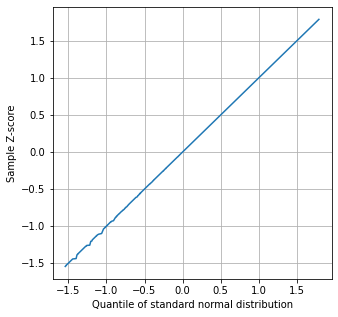

In [ ]:
#Finally we need to sort the output and plot
fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(q,sorted(df1['MonthlyCharges']))
plt.xlabel("Quantile of standard normal distribution")
plt.ylabel("Sample Z-score")
plt.grid()

In [ ]:
df1.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5881,Female,0,No,No,34,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),0.503616,2727.30,No
4635,Female,0,Yes,Yes,40,Yes,No,No,No,No,No,No,No,No,Two year,No,Bank transfer (automatic),-1.484021,777.35,No
97,Male,0,No,No,5,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,-1.454106,113.85,Yes


In [ ]:
SC_yes = df1[df1.SeniorCitizen == 1]
SC_no = df1[df1.SeniorCitizen == 0]
SC_yes.shape

(1142, 20)

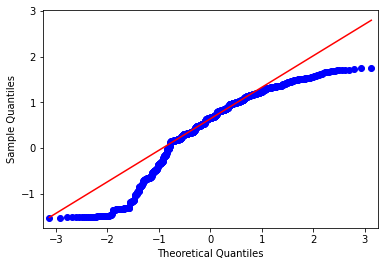

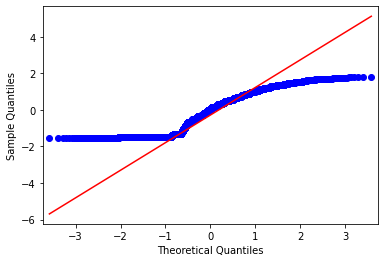

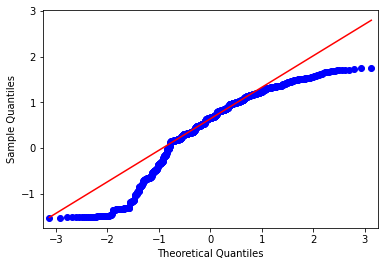

In [ ]:
sm.qqplot(SC_no['MonthlyCharges'], line ="q")
sm.qqplot(SC_yes['MonthlyCharges'], line ="q")

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


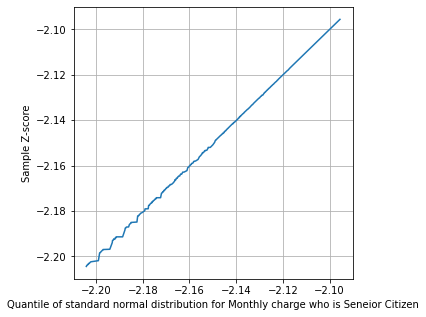

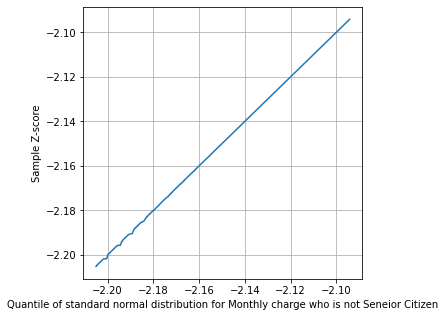

In [ ]:
mean_data_sc_yes = SC_yes['MonthlyCharges'].mean() 
sd_data_sc_yes = SC_yes['MonthlyCharges'].std()
mean_data_sc_no = SC_no['MonthlyCharges'].mean() 
sd_data_sc_no = SC_no['MonthlyCharges'].std()

for i in range(0,SC_yes.shape[0],1):
  SC_yes['MonthlyCharges'].iloc[i] = (SC_yes['MonthlyCharges'].iloc[i]-mean_data)/sd_data 

for i in range(0,SC_no.shape[0],1):
  SC_no['MonthlyCharges'].iloc[i] = (SC_no['MonthlyCharges'].iloc[i]-mean_data)/sd_data

q_yes = []
j_yes =0 
for i_yes in range(1,SC_yes.shape[0]+1,1):
  j_yes = i_yes/SC_yes.shape[0] ;
  q_temp_yes = np.quantile(SC_yes['MonthlyCharges'], j_yes)
  q_yes.append(q_temp_yes)

q_no = []
j_no =0 
for i_no in range(1,SC_no.shape[0]+1,1):
  j_no = i_no/SC_no.shape[0] ;
  q_temp_no = np.quantile(SC_no['MonthlyCharges'], j_no)
  q_no.append(q_temp_no)

fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(q_yes,sorted(SC_yes['MonthlyCharges']))
plt.xlabel("Quantile of standard normal distribution for Monthly charge who is Seneior Citizen")
plt.ylabel("Sample Z-score")
plt.grid()


fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(q_no,sorted(SC_no['MonthlyCharges']))
plt.xlabel("Quantile of standard normal distribution for Monthly charge who is not Seneior Citizen")
plt.ylabel("Sample Z-score")
plt.grid()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


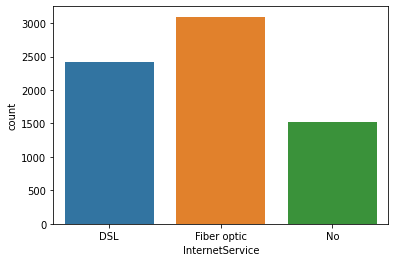

In [ ]:
sns.countplot("InternetService", data=df1)

In [ ]:
#to determine the target variable ( churn - yes or not) we need to chage them in binary 
df1.Churn.replace({'Yes':1,'No':0},inplace = True) 


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
# lets see churn rate based on gender, seniorcitizen...... 
print(df1[['gender','Churn']].groupby(['gender']).mean())
print(df1[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean())
print(df1[['Partner','Churn']].groupby(['Partner']).mean())
print(df1[['PhoneService','Churn']].groupby(['PhoneService']).mean())
#output from this -> gender wil not matter to decide churn , Phoneservice also 
#The churn rate of senior citizens is almost double that of young citizens.
#We do not expect gender to have significant predictive power because similar percentage of churn is shown both when a customer is a man or a woman.
# Customers with a partner churn less than customers with no partner.

           Churn
gender          
Female  0.269595
Male    0.262046
                  Churn
SeniorCitizen          
0              0.236503
1              0.416813
            Churn
Partner          
No       0.329761
Yes      0.197171
                 Churn
PhoneService          
No            0.250000
Yes           0.267475


In [ ]:
df1[['InternetService','Churn']].groupby('InternetService').mean()
# by this we come to know that customers with fiber optic internet service are much likely to churn than other customers

,Churn
InternetService,
DSL,0.189983
Fiber optic,0.418928
No,0.074342


In [ ]:
df1[['InternetService','MonthlyCharges']].groupby('InternetService').count()
# Fiber optic service is much more expensive than others which may be one of the reasons of customers churning.

,MonthlyCharges
InternetService,
DSL,2416
Fiber optic,3096
No,1520


In [ ]:
df1[['StreamingTV','Churn']].groupby('StreamingTV').mean()
df1[['StreamingMovies','Churn']].groupby('StreamingMovies').mean()
df1[['OnlineSecurity','Churn']].groupby('OnlineSecurity').mean()

,Churn
OnlineSecurity,
No,0.313733
Yes,0.146402


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


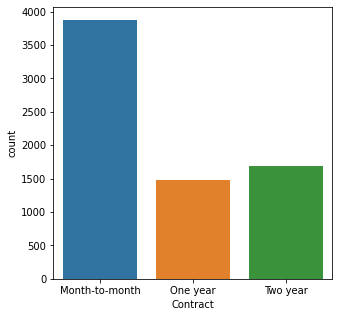

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot("Contract", data=df1)
#It seems like customers with short-term contract are more likely to churn. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


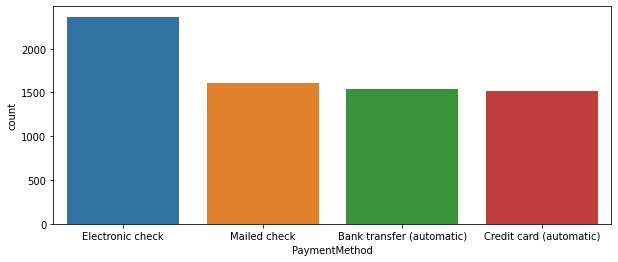

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot("PaymentMethod", data=df1)
# we get Customers who pay with electronic check are more likely to churn

In [ ]:
# Overall : 
#gender wil not matter to decide churn , Phoneservice also 
#The churn rate of senior citizens is almost double that of young citizens.
#We do not expect gender to have significant predictive power because similar percentage of churn is shown both when a customer is a man or a woman.
# Customers with a partner churn less than customers with no partner.
#customers with fiber optic internet service are much likely to churn than other customers as Fiber optic service is much more expensive than others which may be one of the reasons of customers churning
#customers with short-term contract are more likely to churn.
#Customers who pay with electronic check are more likely to churn